**Handwritten digit recognition using CNN**


1.   Here we are using Simple neural netwrok used recognize the hand written digit using Tensorflow Keras.
2.   Initially we are importing the required modules to do our task.

*   Tensorflow - It is used to create and training the ML models
*   Matplotlib - It is a visualization library used to plot the array.
*   seaborn - It is also visualization library for statistical graphics plotting in python.
*   Numpy - Itsupports for large and multi-dimensional array along with high level mathematical function to operate on these array.
*   Math - It can be used for mathematical task.









In [2]:
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sn
import numpy as np
import pandas as pd
import math


Importing Dataset :


*   In this code block we are importing the mnist handwritten dataset. Since it is already available with the keras package, we directly fetching it and split the dataset in to train and test.





In [3]:
!rm -rf ./.logs/
#Removing previous log files

In [4]:
mnist_dataset = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist_dataset.load_data()

11490434/11490434 [==============================] - 1s 0us/step




*   In this block we are finding on thr image's width and height. So that later we can use these to reshaping and model training.

*   Shape function will return 3 values total records in x_train along with its width and height.



*   The training dataset consists of 60000 28x28px images of hand-written digits from 0 to 9.
*   The test dataset consists of 10000 28x28px images.







In [5]:
(_, IMAGE_WIDTH, IMAGE_HEIGHT) = x_train.shape
IMAGE_CHANNELS = 1

print('IMAGE_WIDTH:', IMAGE_WIDTH);
print('IMAGE_HEIGHT:', IMAGE_HEIGHT);
print('IMAGE_CHANNELS:', IMAGE_CHANNELS);

IMAGE_WIDTH: 28
IMAGE_HEIGHT: 28
IMAGE_CHANNELS: 1




*   Reshaping all the records in the x_train to input image shape which we are passing on it.


*   Feature scaling normalisation is performed on the reshaped records, so that all the values will be range between 0 to 255 is converted into 0 to 1.




In [6]:
x_train_with_channels = x_train.reshape(x_train.shape[0],IMAGE_WIDTH,IMAGE_HEIGHT,IMAGE_CHANNELS)
x_test_with_channels = x_test.reshape(x_test.shape[0],IMAGE_WIDTH,IMAGE_HEIGHT,IMAGE_CHANNELS)
x_train_normalized = x_train_with_channels / 255
x_test_normalized = x_test_with_channels / 255

print('x_train_with_chanels:', x_train_with_channels.shape)
print('x_test_with_chanels:', x_test_with_channels.shape)

x_train_with_chanels: (60000, 28, 28, 1)
x_test_with_chanels: (10000, 28, 28, 1)




*   In this block we are building model with necessary layers. All the layers used are provided in detail.


1.   Create a sequential model using sequential API. Sequential model is easy, minimal and aility to ability to represent all the neural network.
2.   Convolution2D - This layer creates a convolution kernel that is convolved with the layer input to produce a tensor of outputs.


    *   Kernal_size - Height and width of convolution filter
    *   Filters - Number of output filters in the colvolution.
    *   Stride - specifying the strides of the convolution along the height and width.
    *   Pool size -(2, 2) will take the max value over a 2x2 pooling window.
    *   Unit - dimensionality of the output space.
    *   Activation - Activation function to use.
    *   Kernal_initialization - Initializer for the kernel weights matrix.



3.   Maxpooling2D - returns the pixel with maximum value from a set of pixels within a kernel. That kernel is swept across the input, subsampling it.
4.   Flatten -Flattening is used to convert all the resultant 2-Dimensional arrays from pooled feature maps into a single long continuous linear vector.

5.   Dense -The dense layer is a neural network layer that is connected deeply, which means each neuron in the dense layer receives input from all neurons of its previous layer. The dense layer is found to be the most commonly used layer in the models.
2.   Dropout -The Dropout layer randomly sets input units to 0 with a frequency of rate at each step during training time, which helps prevent overfitting.














In [7]:
model = tf.keras.models.Sequential()

model.add(tf.keras.layers.Convolution2D(input_shape=(IMAGE_WIDTH, IMAGE_HEIGHT, IMAGE_CHANNELS),kernel_size=5,filters=8,strides=1,activation=tf.keras.activations.relu,kernel_initializer=tf.keras.initializers.VarianceScaling()))

model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2),strides=(2, 2)))

model.add(tf.keras.layers.Convolution2D(kernel_size=5,filters=16,strides=1,activation=tf.keras.activations.relu,kernel_initializer=tf.keras.initializers.VarianceScaling()))

model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2),strides=(2, 2)))

model.add(tf.keras.layers.Flatten())

model.add(tf.keras.layers.Dense(units=128,activation=tf.keras.activations.relu));

model.add(tf.keras.layers.Dropout(0.2))

model.add(tf.keras.layers.Dense(units=10,activation=tf.keras.activations.softmax,kernel_initializer=tf.keras.initializers.VarianceScaling()))



*   Now compile the model with the necessary optimizer along with the loss function and also with metric to be calculated. Below adam optimizer is used as optimizer.



In [8]:
adam_optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)

model.compile(optimizer=adam_optimizer,loss=tf.keras.losses.sparse_categorical_crossentropy,metrics=['accuracy'])



*   Now initilize the training using the fit function with epochs and necessary records.


*   Epochs - An epoch consists of passing a dataset through the algorithm completely. Each Epoch consists of many weight update steps. To optimize the learning process, gradient descent is used, which is an iterative process. It improves the internal model parameters over many steps and not at once.





In [9]:
training_history = model.fit(x_train_normalized,y_train,epochs=10,validation_data=(x_test_normalized, y_test))

Epoch 1/10
1875/1875 [==============================] - 36s 19ms/step - loss: 0.2177 - accuracy: 0.9334 - val_loss: 0.0650 - val_accuracy: 0.9786
Epoch 2/10
1875/1875 [==============================] - 38s 20ms/step - loss: 0.0756 - accuracy: 0.9764 - val_loss: 0.0478 - val_accuracy: 0.9851
Epoch 3/10
1875/1875 [==============================] - 36s 19ms/step - loss: 0.0564 - accuracy: 0.9829 - val_loss: 0.0339 - val_accuracy: 0.9882
Epoch 4/10
1875/1875 [==============================] - 37s 20ms/step - loss: 0.0442 - accuracy: 0.9860 - val_loss: 0.0358 - val_accuracy: 0.9877
Epoch 5/10
1875/1875 [==============================] - 34s 18ms/step - loss: 0.0353 - accuracy: 0.9889 - val_loss: 0.0343 - val_accuracy: 0.9883
Epoch 6/10
1875/1875 [==============================] - 35s 19ms/step - loss: 0.0305 - accuracy: 0.9899 - val_loss: 0.0315 - val_accuracy: 0.9903
Epoch 7/10
1875/1875 [==============================] - 35s 19ms/step - loss: 0.0271 - accuracy: 0.9909 - val_loss: 0.0296 -



*   Once the training has done, we need to draw training graph to get to know about how the training set loss is reduced over the training time and also how accurarcy is imporving over training time.


*   We are using matplotlib to draw the graph.





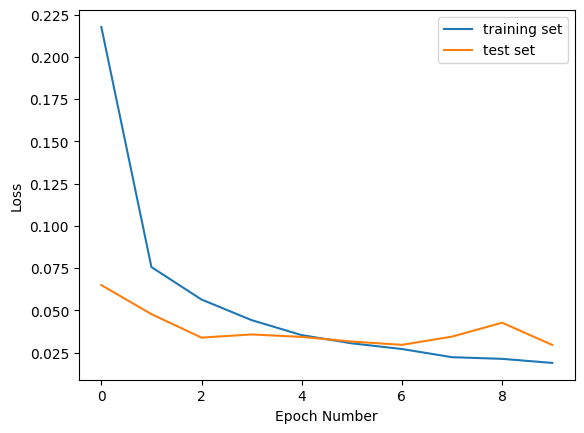

In [10]:
plt.xlabel('Epoch Number')
plt.ylabel('Loss')
plt.plot(training_history.history['loss'], label='training set')
plt.plot(training_history.history['val_loss'], label='test set')
plt.legend()

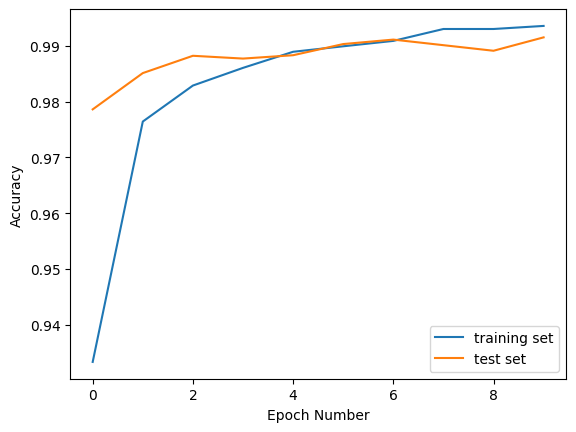

In [11]:
plt.xlabel('Epoch Number')
plt.ylabel('Accuracy')
plt.plot(training_history.history['accuracy'], label='training set')
plt.plot(training_history.history['val_accuracy'], label='test set')
plt.legend()



*   Once the training is done we need to evaluate the trained model by comparing the accurarcy on the model over training and test data.



In [12]:
train_loss, train_accuracy = model.evaluate(x_train_normalized, y_train)
print('Training loss: ', train_loss)
print('Training accuracy: ', train_accuracy)
validation_loss, validation_accuracy = model.evaluate(x_test_normalized, y_test)
print('Validation loss: ', validation_loss)
print('Validation accuracy: ', validation_accuracy)

1875/1875 [==============================] - 14s 8ms/step - loss: 0.0088 - accuracy: 0.9973
Training loss:  0.008818048983812332
Training accuracy:  0.9972666501998901
313/313 [==============================] - 2s 7ms/step - loss: 0.0296 - accuracy: 0.9915
Validation loss:  0.02956290915608406
Validation accuracy:  0.9915000200271606


Confusion matrix


*   A confusion matrix presents a table layout of the different outcomes of the prediction and results of a classification problem and helps visualize its outcomes. It plots a table of all the predicted and actual values of a classifier
*   For Example : we can take 0. 925 times 0 is classified as 0 and zero times as 2 and one time as 3 and so on.


*   We are using seaborn for graphical representation.





313/313 [==============================] - 2s 5ms/step
tf.Tensor(
[[ 975    1    0    0    0    0    1    2    1    0]
 [   0 1133    0    2    0    0    0    0    0    0]
 [   1    2 1021    0    0    0    0    7    1    0]
 [   0    0    1 1005    0    3    0    1    0    0]
 [   0    2    1    0  973    0    3    0    0    3]
 [   0    0    0    5    0  885    1    0    1    0]
 [   3    2    0    1    2    1  947    0    2    0]
 [   0    2    2    1    0    0    0 1021    1    1]
 [   0    0    2    0    1    1    0    1  968    1]
 [   0    2    0    3    5    5    0    7    4  983]], shape=(10, 10), dtype=int32)


Text(95.72222222222221, 0.5, 'Truth')

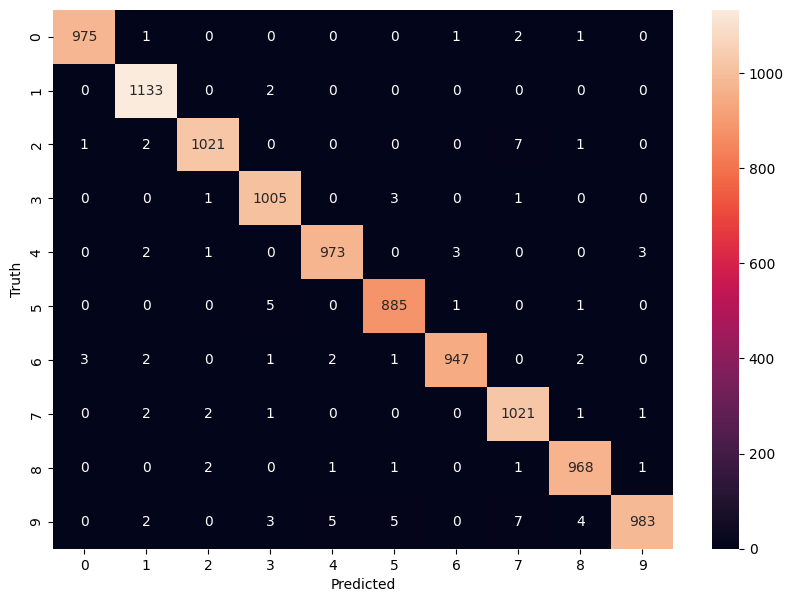

In [13]:
y_predicted = model.predict(x_test)
y_predicted_labels = [np.argmax(i) for i in y_predicted]
cm = tf.math.confusion_matrix(labels=y_test, predictions=y_predicted_labels)
print(cm)
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')



*   Passing a random image on the model to test model is predicting the correct value or not.



1/1 [==============================] - 0s 81ms/step
8


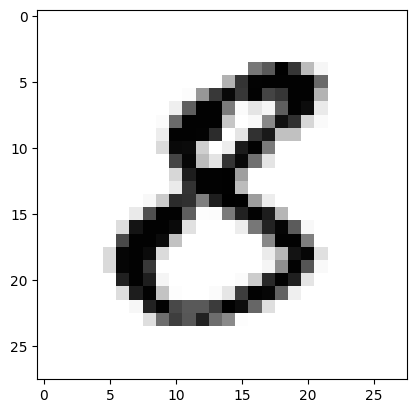

In [14]:
image_index = 1234
plt.imshow(x_test[image_index].reshape(28, 28),cmap='Greys')
pred = model.predict(x_test[image_index].reshape(1, 28, 28, 1))
print(pred.argmax())